In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import os
import math
#import imageio
from scipy.ndimage.interpolation import map_coordinates
from pprint import pprint
import glob
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
import copy
#from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from scipy import stats
import multiprocessing as mp

In [2]:
_wbgyr_cdict = {'red': ((0.0,  255./255, 255./255),
                        (0.125, 173./255, 173./255),
                        (0.25,  95./255,  95./255),
                        (0.375, 73./255,  73./255),
                        (0.5,  165./255, 164./255),
                        (0.625, 248./255, 248./255),
                        (0.75, 236./255, 236./255),
                        (0.875, 200./255, 200./255),
                        (1.0,  146./255, 146./255)),
                'green': ((0.0,  255./255, 255./255),
                          (0.125, 224./255, 224./255),
                          (0.25, 163./255, 163./255),
                          (0.375, 166./255, 166./255),
                          (0.5,  207./255, 207./255),
                          (0.625, 184./255, 184./255),
                          (0.75,  86./255,  86./255),
                          (0.875, 29./255,  29./255),
                          (1.0,   21./255,  21./255)),
                'blue': ((0.0,  255./255, 255./255),
                         (0.125, 248./255, 248./255),
                         (0.25, 214./255, 214./255),
                         (0.375, 120./255, 120./255),
                         (0.5,   81./255,  81./255),
                         (0.625, 73./255,  73./255),
                         (0.75,  41./255,  41./255),
                         (0.875, 38./255,  38./255),
                         (1.0,   25./255,  25./255))}
# And reverse
_wbgyr_cdict_r = copy.deepcopy(_wbgyr_cdict)
for i in _wbgyr_cdict_r.keys():
    _wbgyr_cdict_r[i] = [(1-j[0], j[1], j[2]) for j in _wbgyr_cdict_r[i]]
    _wbgyr_cdict_r[i].reverse()

cmap = LinearSegmentedColormap('WBGYR', _wbgyr_cdict)
cmap.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap)

cmap_r = LinearSegmentedColormap('WBGYR', _wbgyr_cdict_r)
cmap_r.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap_r)

In [3]:
cirrus = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_testdelete/2008/*',combine='nested',concat_dim='time')['ConvCir']
detrainedtsc = np.where(cirrus>0,tsc,np.nan)
insitutsc = np.where(cirrus<0,tsc,np.nan)
tsc = xr.open_mfdataset('/net/seldon/disk2/Users/gah20/TSCISCCP/TSC_testdelete/2008/*',combine='nested',concat_dim='time')['TSC']

In [30]:
yearlymean = np.nanmedian(cirrus,axis=0)

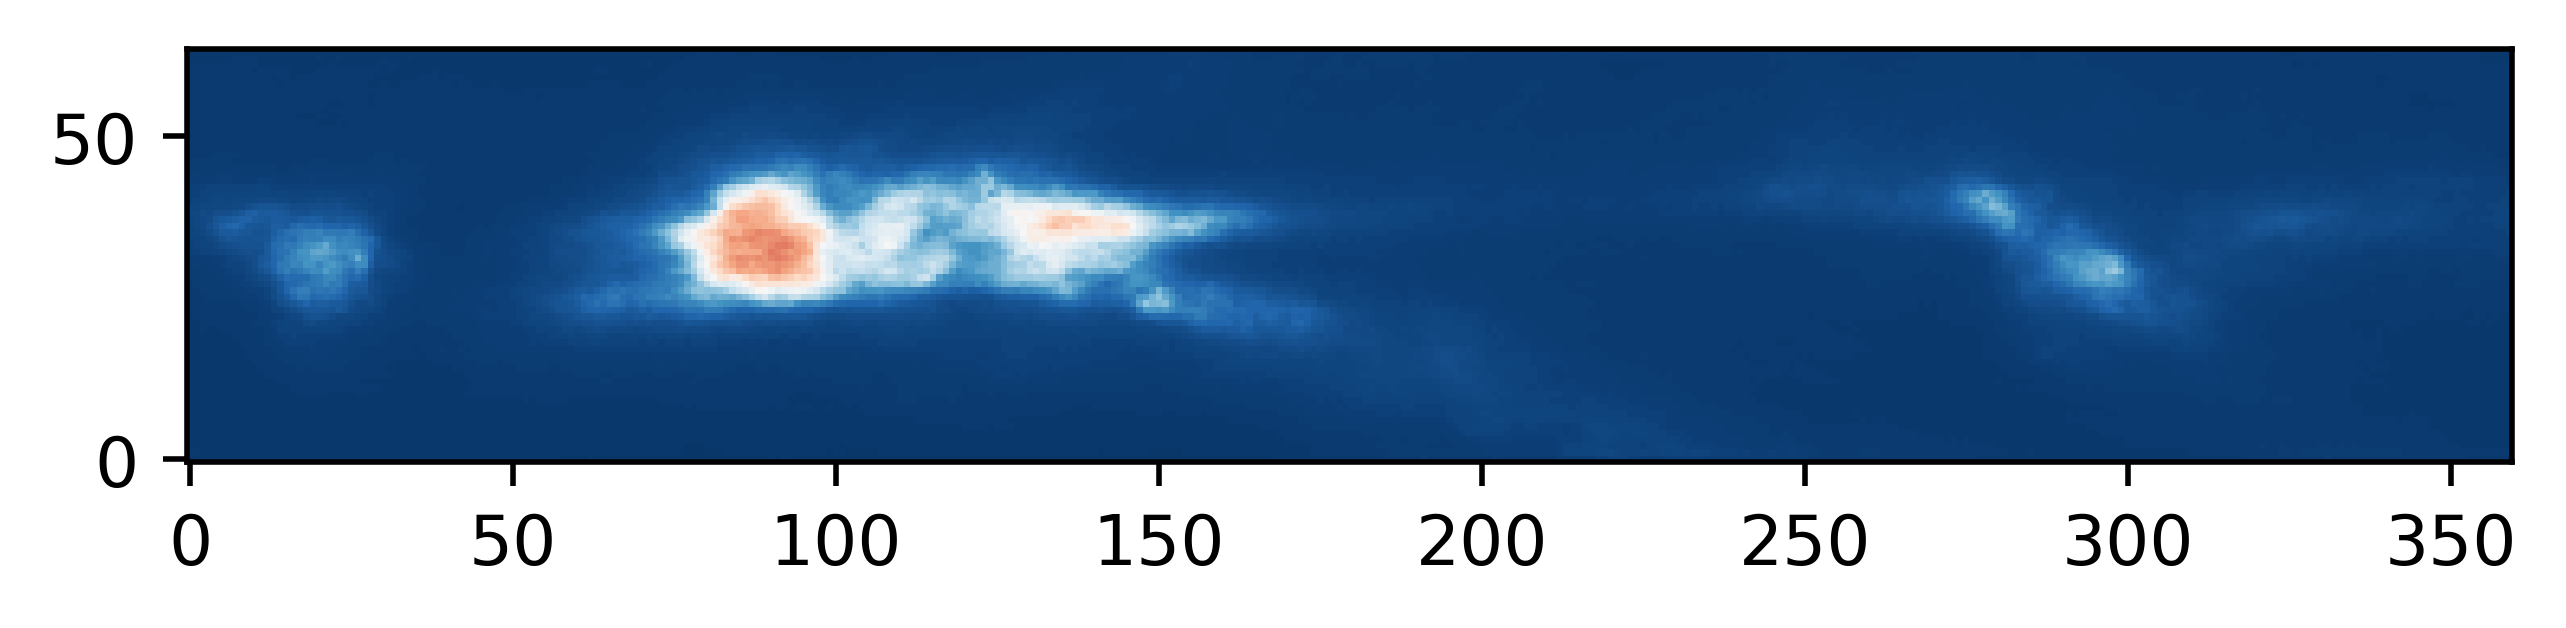

In [31]:
plt.figure(dpi=500)

plt.imshow(yearlymean,vmax=100,vmin=-100,cmap='RdBu_r',interpolation='none',origin='lower')

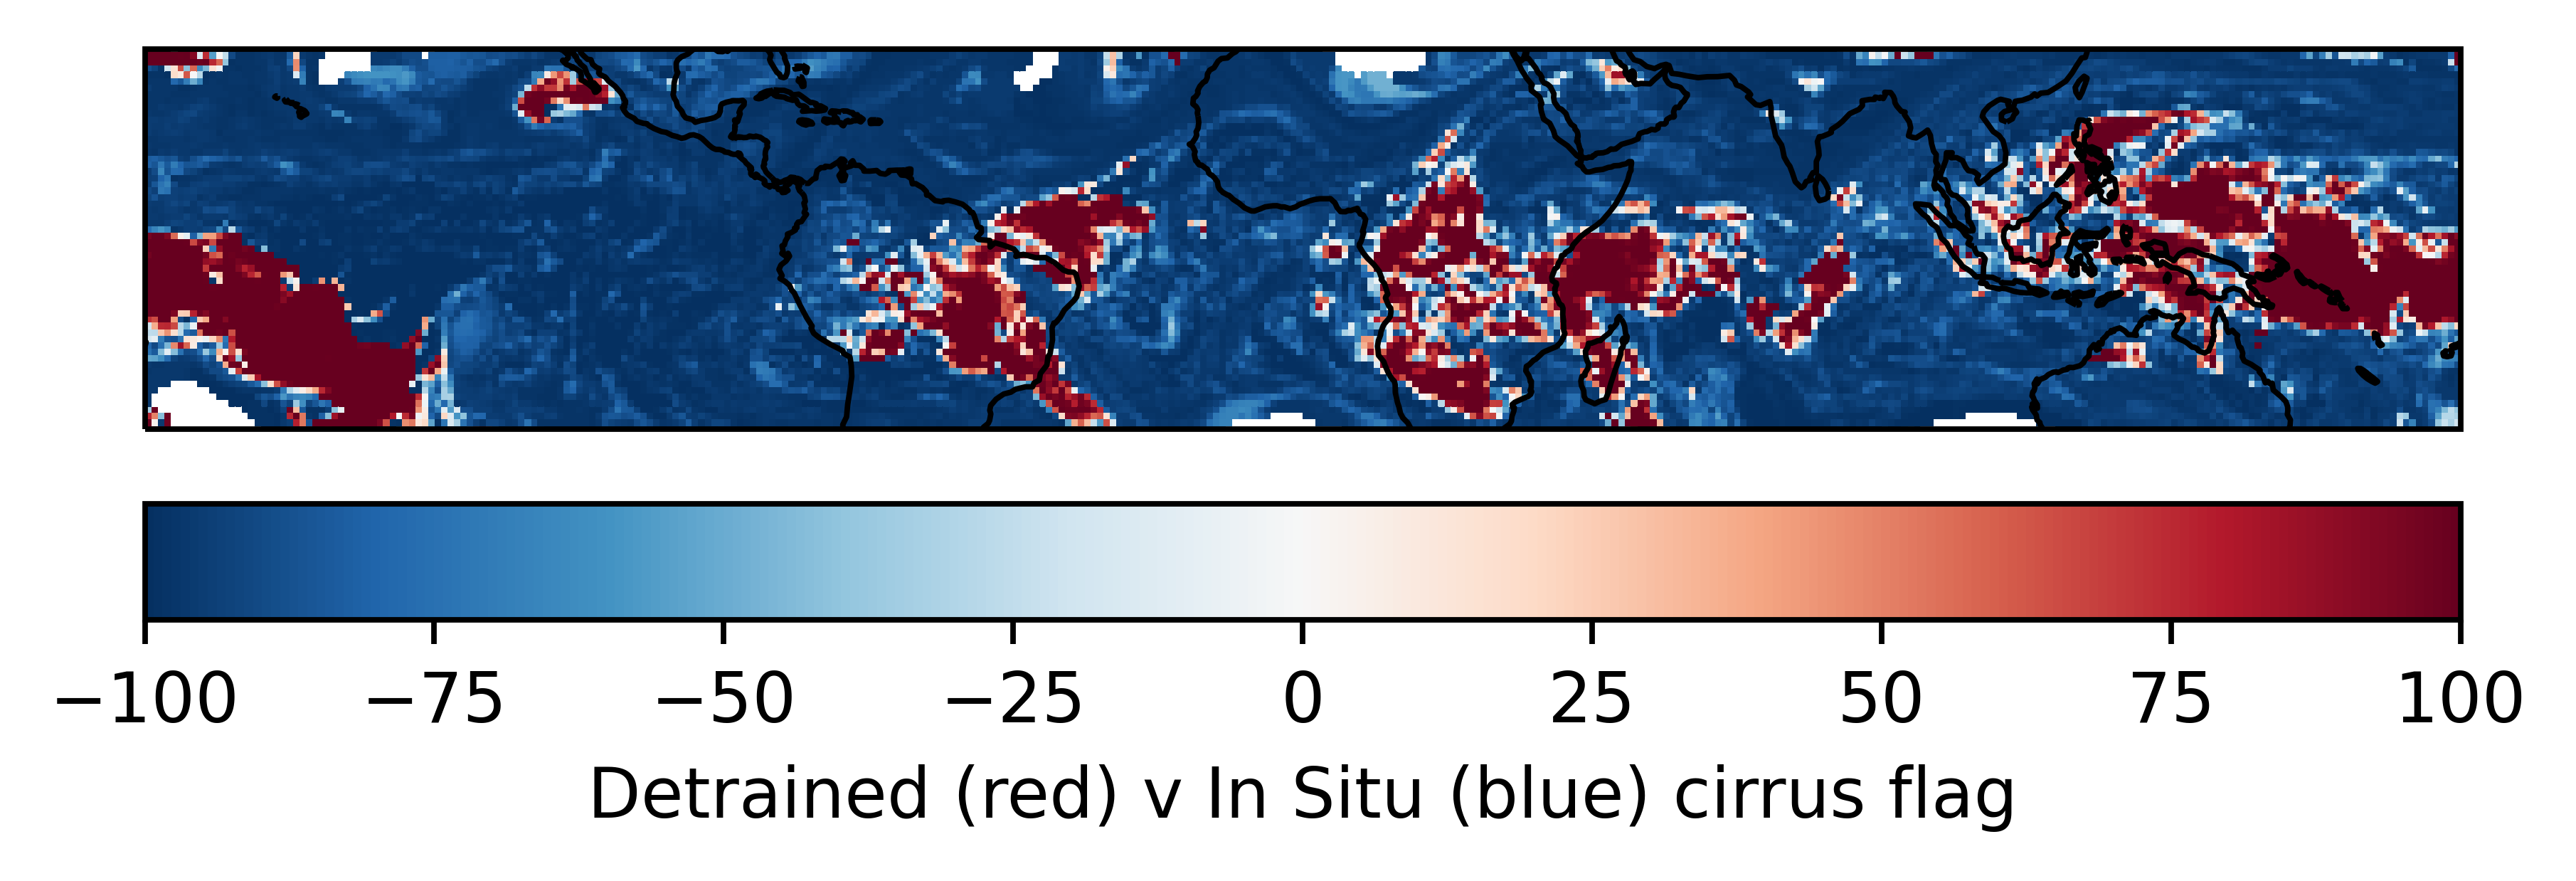

In [117]:
fig = plt.figure(dpi=700)
img_extent = (-180,180,-30,30)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-29.5,29.5],ccrs.PlateCarree())
ax.coastlines(linewidth=0.8,resolution='110m',color='black')
im=plt.imshow(cirrus[500,2:62],interpolation='none',vmin=-100,vmax=100,cmap='RdBu_r',origin='lower',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=180))
plt.colorbar(im,orientation='horizontal',label='Detrained (red) v In Situ (blue) cirrus flag',pad=0.05)
plt.savefig('/disk1/Users/gah20/detvinsit_snapshot.png',dpi=700,bbox_inches='tight')

/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'interpolation', 'labels'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


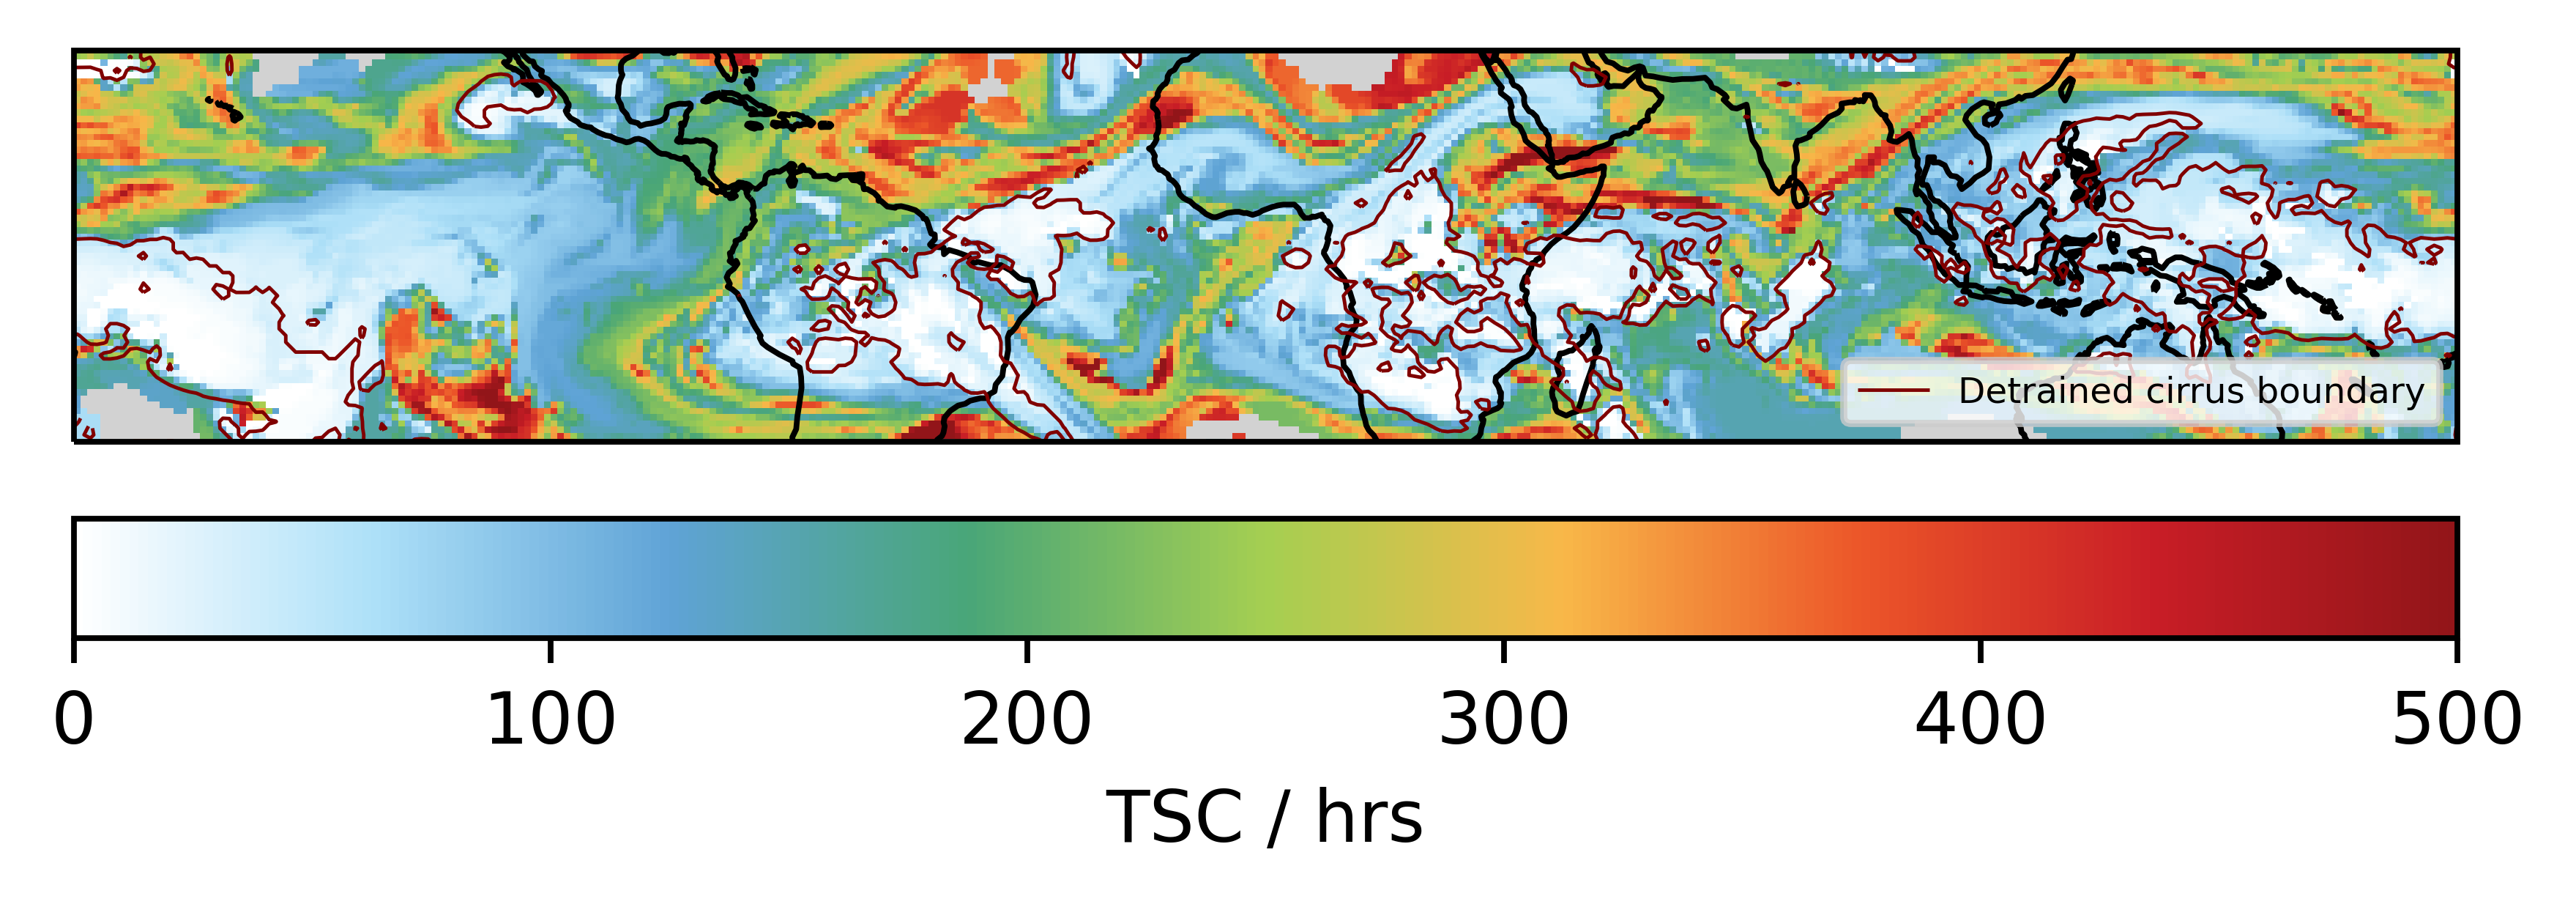

In [93]:
fig = plt.figure(dpi=700)
img_extent = (-180,180,-30,30)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-29.5,29.5],ccrs.PlateCarree())
ax.coastlines(linewidth=0.8,resolution='110m',color='black')
im=plt.imshow(tsc[500],interpolation='none',vmin=0,vmax=500,cmap=cmap,origin='lower',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=180))
plt.colorbar(im,orientation='horizontal',label='TSC / hrs',pad=0.05)

cntr1 = plt.contour(cirrus[500,2:62],cmap='seismic_r',levels=[0,100],linewidths=0.5,interpolation='none',origin='lower',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=180),labels='Detrained cirrus boundary')

h1,_ = cntr1.legend_elements()

plt.legend([h1[0]], ['Detrained cirrus boundary'],fontsize=5,loc='lower right')

plt.savefig('/disk1/Users/gah20/TSC_withDetrained.png',dpi=700,bbox_inches='tight')

In [5]:
detrainedtsc = np.where(cirrus>0,tsc,np.nan)
insitutsc = np.where(cirrus<0,tsc,np.nan)

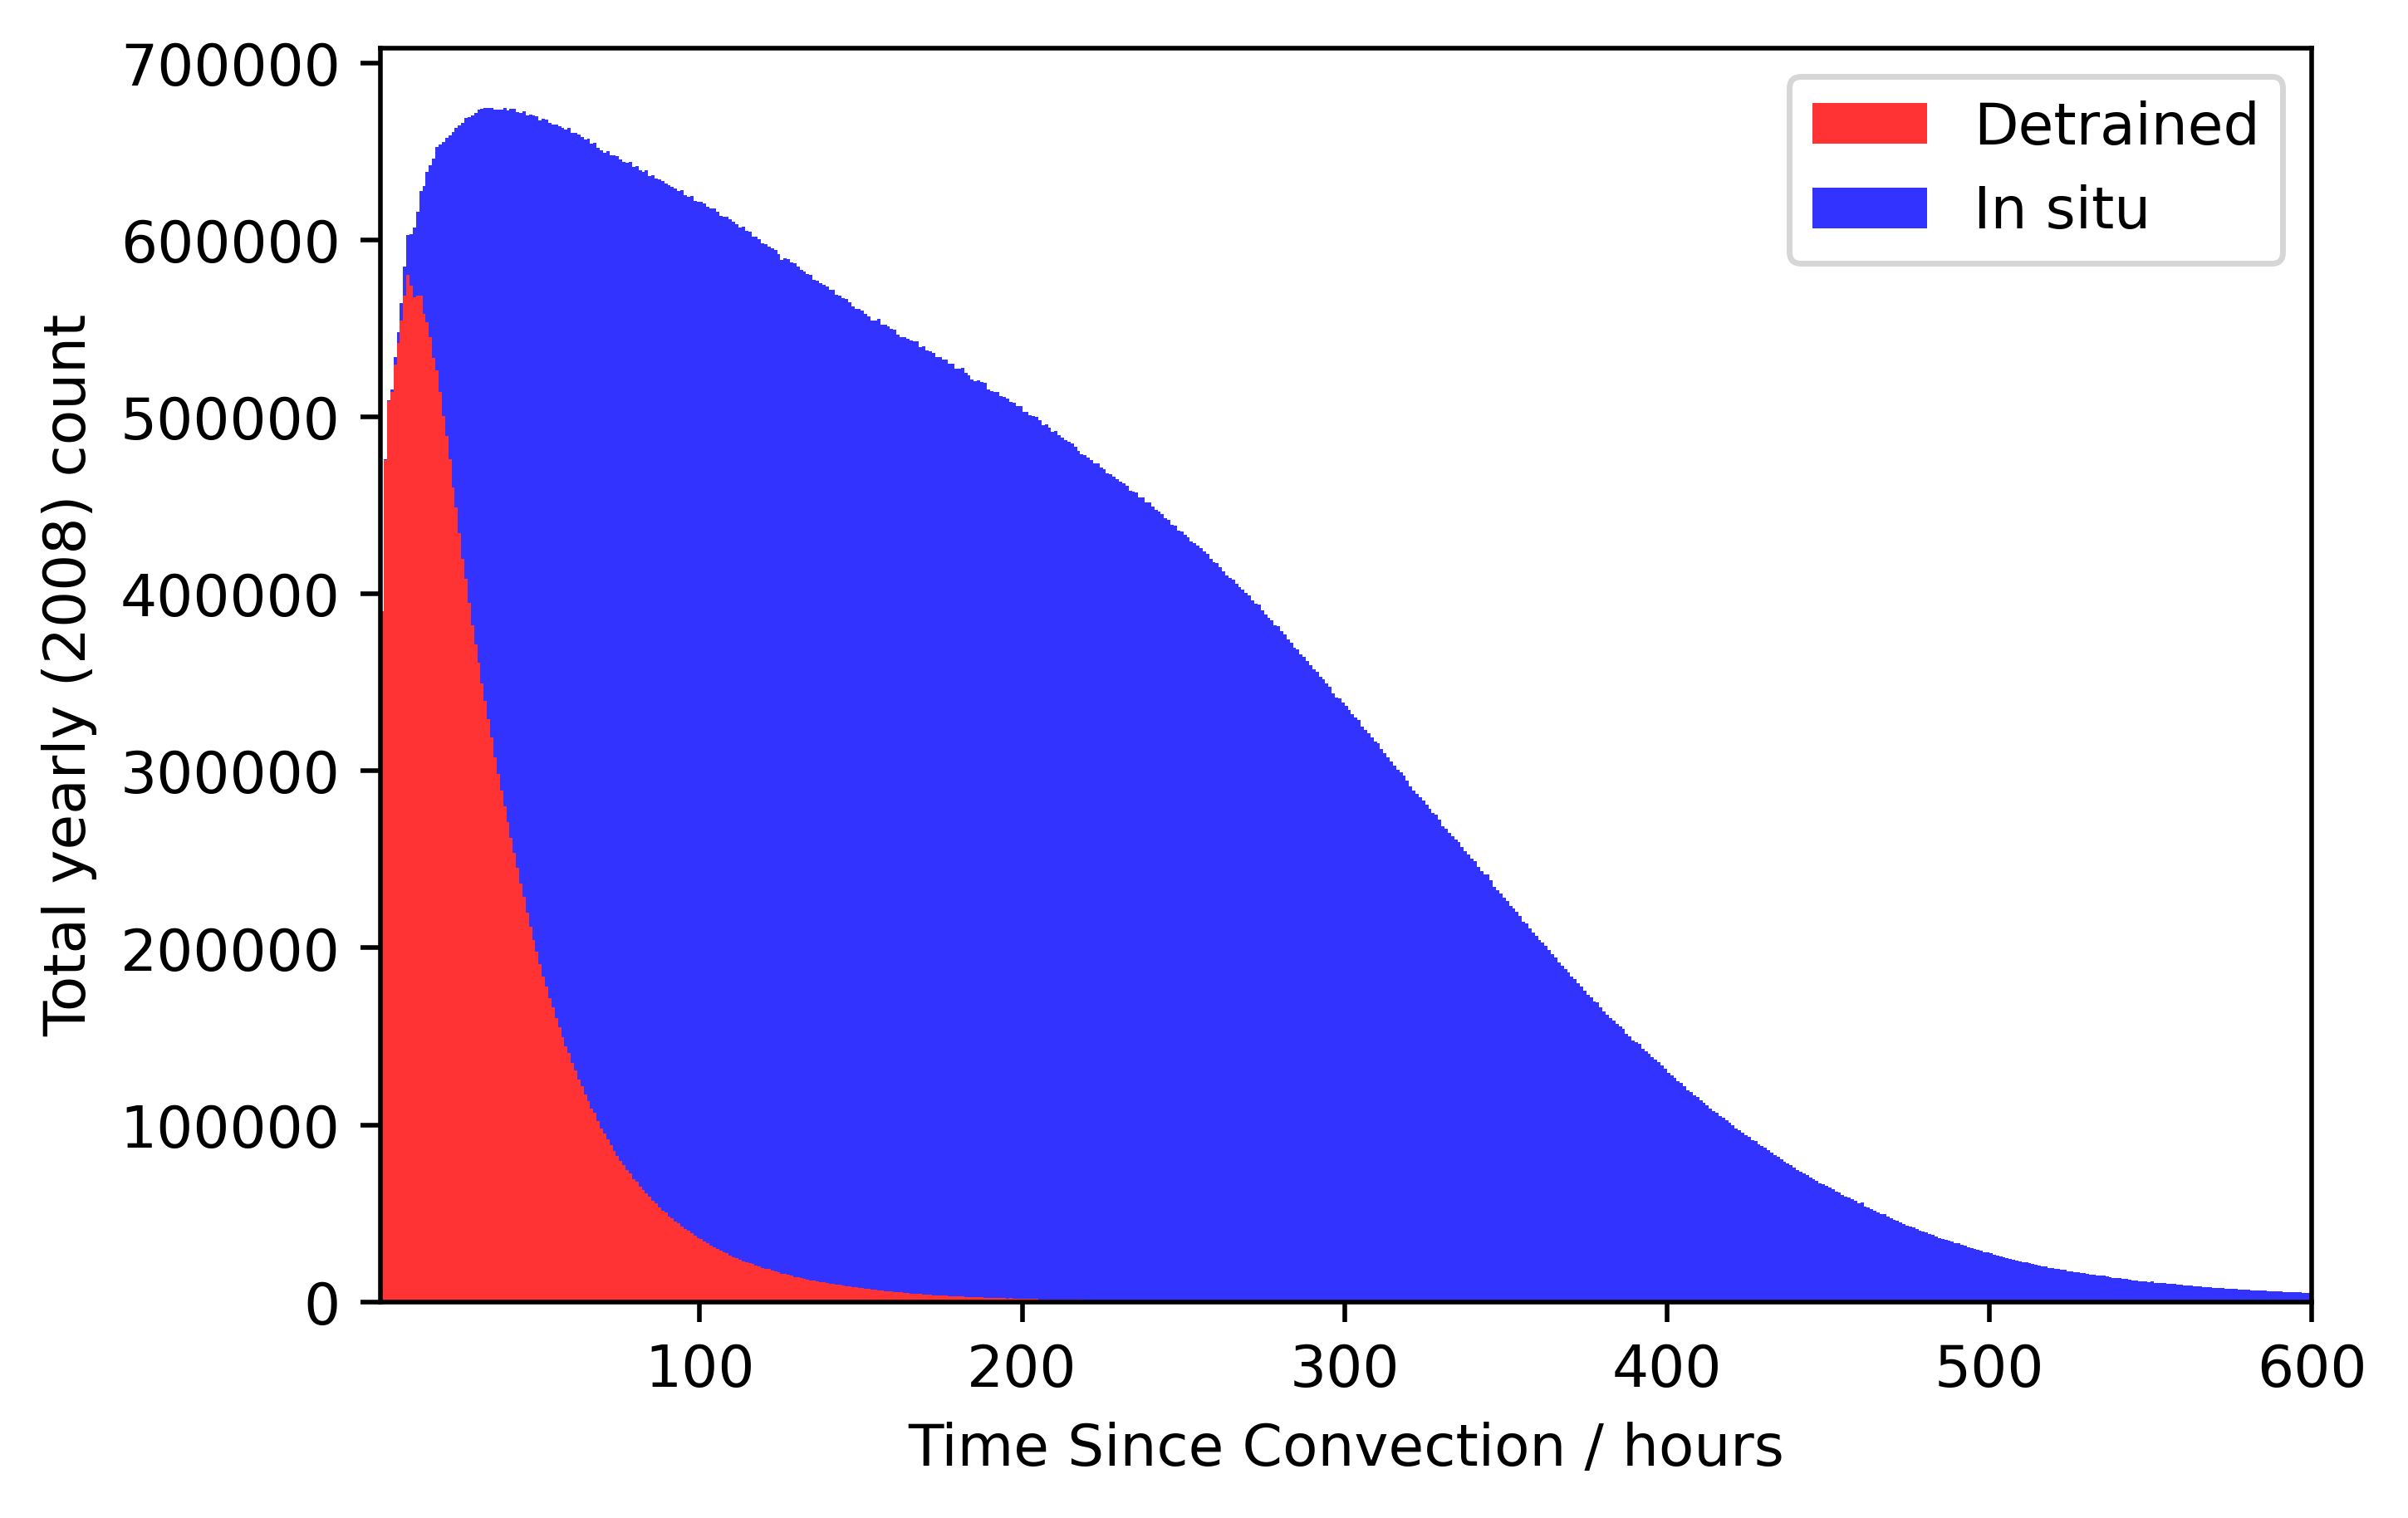

In [14]:
plt.figure(dpi=500)
plt.hist((detrainedtsc.flatten(),insitutsc.flatten()),np.arange(1,601,1),alpha=0.8,color=['red','blue'],label=['Detrained','In situ'],stacked=True)
#plt.hist(insitutsc.flatten(),np.arange(1,601,1),alpha=0.5,color='blue',label='In situ')
#plt.hist(np.asarray(tsc).flatten(),np.arange(1,601,1),alpha=0.5,color='black',label='TSC total')
plt.xlim(1,600)
plt.xlabel('Time Since Convection / hours')
plt.ylabel('Total yearly (2008) count')
plt.legend()
#plt.savefig('/disk1/Users/gah20/DvI_histogram.png',dpi=700,bbox_inches='tight')
plt.show()